# Tasca dades, probabilitats i estadístiques


Aprèn a realitzar estadístiques amb Python.



In [52]:
import pandas as pd
import numpy as np

from scipy import stats
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Nivell 1
- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 



Para este ejercicio usaré la base de datos **mlbbat10.txt**, que se puede descargar de:

https://www.openintro.org/data/index.php?data=mlbbat10

En este enlace se puede consultar una descripción de los campos.

In [5]:
# Carga del archivo
players=pd.read_table('./datasets/mlbbat10.txt')

In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1199 non-null   object 
 1   team      1199 non-null   object 
 2   position  1199 non-null   object 
 3   G         1199 non-null   int64  
 4   AB        1199 non-null   int64  
 5   R         1199 non-null   int64  
 6   H         1199 non-null   int64  
 7   2B        1199 non-null   int64  
 8   3B        1199 non-null   int64  
 9   HR        1199 non-null   int64  
 10  RBI       1199 non-null   int64  
 11  TB        1199 non-null   int64  
 12  BB        1199 non-null   int64  
 13  SO        1199 non-null   int64  
 14  SB        1199 non-null   int64  
 15  CS        1199 non-null   int64  
 16  OBP       1199 non-null   float64
 17  SLG       1199 non-null   float64
 18  AVG       1199 non-null   float64
dtypes: float64(3), int64(13), object(3)
memory usage: 178.1+ KB


Voy a crear una función que calcule los principales estadísticos, media, moda, mediana y desviación estandar.

Y la voy a aplicar a la variable G, que representa el número de partidos jugados.

In [10]:
def estadisticos(dataset,variable):
    resultado={'Variable':variable,
               'Media':dataset[variable].mean(),
               'Mediana':dataset[variable].median(),
               'Moda':dataset[variable].mode(),
               'Desviación Estandar':dataset[variable].std()}
    return resultado

In [11]:
partidos=estadisticos(players,'G')

In [12]:
print(partidos)

{'Variable': 'G', 'Media': 50.534612176814015, 'Mediana': 31.0, 'Moda': 0    2
dtype: int64, 'Desviación Estandar': 49.54437071061394}


- Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 




Veamos ahora la correlación entre el número de partidos y el número de runs.

In [26]:
players.G.corr(players.R)

0.9037743675884315

Existe una correlación positiva bastante fuerte entre el número de juegos y el numero de "runs".

## Nivell 2

- Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.




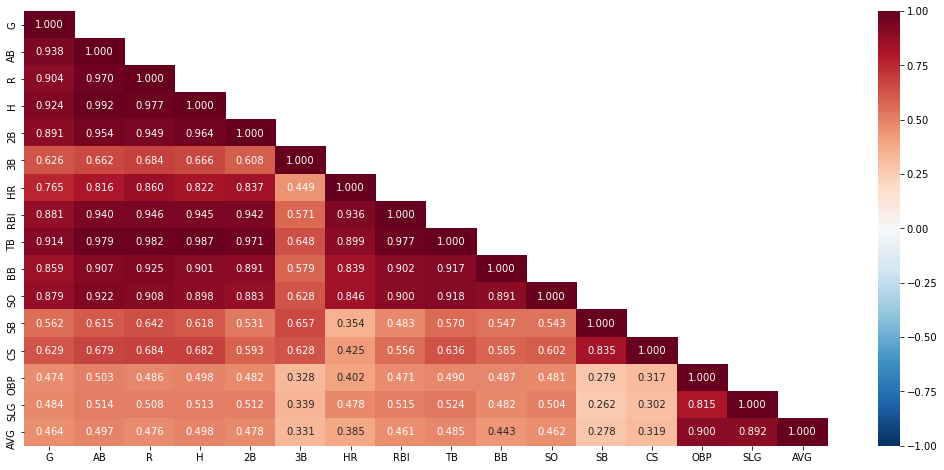

In [31]:

# Matriz de correlación de las variables numéricas
#---------------------------------------------------------------------------
fig, axes = plt.subplots(figsize=(18, 8))

sns.heatmap(players.corr(),
           vmin=-1.0,
           vmax=1.0,
           annot=True, fmt='.3f',
           mask=np.tri(len(players.corr()),len(players.corr()),k=-1,dtype=bool).T,
           cmap='RdBu_r');

## Nivell 3

- Exercici 4

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.



**Media armónica**.

La media armónica (designada usualmente mediante H) de una cantidad finita de números es igual al recíproco, o inverso, de la media aritmética de los recíprocos de dichos valores y es recomendada para promediar velocidades.

Así, dados n números x1, x2, ... , xn la media armónica será igual a:

   $ H =\frac{n }{( \frac{1}{x_1} + ⋯ + \frac{1}{x_n})}$

La media armónica resulta poco influida por la existencia de determinados valores mucho más grandes que el conjunto de los otros, siendo en cambio sensible a valores mucho más pequeños que el conjunto.

La media armónica no está definida en el caso de que exista algún valor nulo. 

In [46]:
# Existen valores nulos en la variable G?
players[players.G==0].G.sum()  

0

In [41]:
# Media armónica con la función hmean() de scipy.
stats.hmean(players.G)

7.187464926137136

In [54]:
# Media armónica con el módulo statistics.
statistics.harmonic_mean(players.G)

7.187464926137135

**Media geométrica**.

la media geométrica de una cantidad arbitraria de números (por decir n números) es la raíz n-ésima del producto de todos los números; es recomendada para datos de progresión geométrica, para promediar razones, interés compuesto y números índice. 

In [48]:
# Media geométrica con la función gmean() de scipy.
stats.gmean(players.G)

23.349599176875284

In [55]:
# Media geométrica con el módulo statistics.
statistics.geometric_mean(players.G)

23.349599176875284